# Data Visualization Ford Go Bike
## by Sushil Pathak

## Preliminary Wrangling

>This process try to understand about the data that bicycyle rental company is collecting

In [134]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [135]:
df1=pd.read_csv('201801.csv')
df1.shape

(94802, 16)

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [136]:
file=['201801.csv','201802.csv','201803.csv','201804.csv','201805.csv','201806.csv','201807.csv']
df=pd.concat([pd.read_csv(f) for f in file])

In [137]:
df.shape

(1018386, 16)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018386 entries, 0 to 199221
Data columns (total 16 columns):
duration_sec               1018386 non-null int64
start_time                 1018386 non-null object
end_time                   1018386 non-null object
start_station_id           1013141 non-null float64
start_station_name         1013141 non-null object
start_station_latitude     1018386 non-null float64
start_station_longitude    1018386 non-null float64
end_station_id             1013141 non-null float64
end_station_name           1013141 non-null object
end_station_latitude       1018386 non-null float64
end_station_longitude      1018386 non-null float64
bike_id                    1018386 non-null int64
user_type                  1018386 non-null object
member_birth_year          947260 non-null float64
member_gender              947522 non-null object
bike_share_for_all_trip    1018386 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 132.1+ MB


In [139]:
df.user_type.value_counts()

Subscriber    857593
Customer      160793
Name: user_type, dtype: int64

### What is the structure of your dataset?

> The data set include 183412 rows and 16 columns.Structure of dataset 
looks like this 
<ul>

<li>duration_sec                int   </li>
<li>start_time                 object </li>
<li>end_time                   object </li>
<li>start_station_id           float64</li>
<li>start_station_name         object </li>
<li>start_station_latitude     float64</li>
<li>start_station_longitude    float64</li>
<li>end_station_id             float64</li>
<li>end_station_name           object </li>
<li>end_station_latitude       float64</li>
<li>end_station_longitude      float64</li>
<li>bike_id                    int64  </li>
<li>user_type                  object </li>
<li>member_birth_year          loat64 </li>
<li>member_gender              object </li>
</ul>                                

<ul>
    <li>Looking at structure we can see that time varible is in object data type i.e. string. They needed to be converted in date time format</li>
    
  </ul>

### What is/are the main feature(s) of interest in your dataset?

 <ul>
    <li>Total Average trip </li>
    <li>Average trip grouped by on gender</li>
    <li>Trend of average time based on monthly bike ride.</li>
    <li>Relationship between rides and gender </li>
    </ul>

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>Start Time and end Time can help to find out the average trip. Gender will be used to find out the average ride made based on gender.Based on the usertype we can find out the trend

#### Cleaning the data to support feature

In [140]:
df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])

In [141]:
df['age']=2021-df['member_birth_year']

In [142]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No,35.0
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No,NaN
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No,25.0
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No,NaN
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No,30.0
5,6477,2018-01-31 22:58:44.867,2018-02-01 00:46:41.908,236.0,Market St at 8th St,37.803686,-122.282497,160.0,West Oakland BART Station,37.805318,-122.294837,1306,Customer,NaN,NaN,No,NaN
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988.0,Male,No,33.0
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980.0,Male,No,41.0
8,996,2018-01-31 23:34:56.004,2018-01-31 23:51:32.674,134.0,Valencia St at 24th St,37.752428,-122.420628,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,1987.0,Male,Yes,34.0
9,825,2018-01-31 23:34:14.027,2018-01-31 23:47:59.809,305.0,Ryland Park,37.342725,-121.895617,317.0,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,1994.0,Female,Yes,27.0


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018386 entries, 0 to 199221
Data columns (total 17 columns):
duration_sec               1018386 non-null int64
start_time                 1018386 non-null datetime64[ns]
end_time                   1018386 non-null datetime64[ns]
start_station_id           1013141 non-null float64
start_station_name         1013141 non-null object
start_station_latitude     1018386 non-null float64
start_station_longitude    1018386 non-null float64
end_station_id             1013141 non-null float64
end_station_name           1013141 non-null object
end_station_latitude       1018386 non-null float64
end_station_longitude      1018386 non-null float64
bike_id                    1018386 non-null int64
user_type                  1018386 non-null object
member_birth_year          947260 non-null float64
member_gender              947522 non-null object
bike_share_for_all_trip    1018386 non-null object
age                        947260 non-null float64
dt

## Univariate Exploration

Text(0.5, 1.0, 'AVG Bike trip in Seconds')

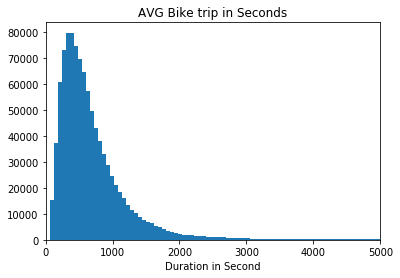

In [144]:
bins=np.arange(0,df['duration_sec'].max()+50,60)
plt.hist(data=df, x='duration_sec',bins=bins)
plt.xlim([0,5000])
plt.xlabel('Duration in Second')
plt.title('AVG Bike trip in Seconds')


>Looking at the Graph it looks like there is 375,000 bike ride with an average of 877 second.  

#### Now converting second into minutes

In [145]:
df['duration_minutes']=df['duration_sec']/60

### Average trips vs Minutes 

Text(0.5, 1.0, 'AVG Bike trip in Minutes')

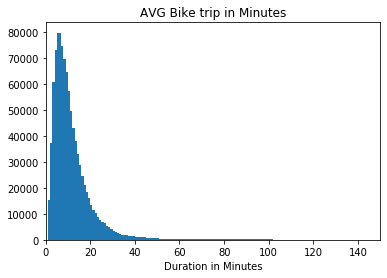

In [146]:
bins=np.arange(0,df['duration_minutes'].max()+1,1)
plt.hist(data=df, x='duration_minutes',bins=bins)
plt.xlim([0,150])
plt.xlabel('Duration in Minutes')
plt.title('AVG Bike trip in Minutes')


Looking at the Graph it looks like there is 375,000 bike ride with an average of 14 minutes.

### Average trips vs Hour 

In [147]:
df['duration_hr']=df['duration_minutes']/60

Text(0.5, 1.0, 'AVG Bike trip in Hour')

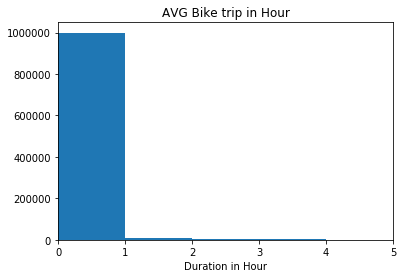

In [148]:
bins=np.arange(0,df['duration_hr'].max()+1,1)
plt.hist(data=df, x='duration_hr',bins=bins)
plt.xlim(0,5)
plt.xlabel('Duration in Hour')
plt.title('AVG Bike trip in Hour')


> In the hour graph there is an outlier because in second and minute histogram there are no any records that indicate there has been trip for more than 3 hour 

In [149]:
outlier=df[df['duration_hr']>3]
outlier

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_minutes,duration_hr
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No,35.0,1254.733333,20.912222
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No,NaN,1423.700000,23.728333
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No,25.0,1192.933333,19.882222
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No,NaN,1017.933333,16.965556
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No,30.0,666.100000,11.101667
85,14366,2018-01-31 18:09:22.537,2018-01-31 22:08:49.392,250.0,North Berkeley BART Station,37.874014,-122.283019,259.0,Addison St at Fourth St,37.866249,-122.299371,3694,Subscriber,1979.0,Male,No,42.0,239.433333,3.990556
86,12167,2018-01-31 18:45:53.099,2018-01-31 22:08:40.150,64.0,5th St at Brannan St,37.776754,-122.399018,58.0,Market St at 10th St,37.776619,-122.417385,3483,Customer,1989.0,Male,No,32.0,202.783333,3.379722
655,20927,2018-01-31 13:18:38.739,2018-01-31 19:07:25.778,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,214,Customer,NaN,NaN,No,NaN,348.783333,5.813056
657,20944,2018-01-31 13:18:09.755,2018-01-31 19:07:14.091,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,2139,Customer,NaN,NaN,No,NaN,349.066667,5.817778
746,46259,2018-01-31 06:01:40.813,2018-01-31 18:52:39.958,41.0,Golden Gate Ave at Polk St,37.781270,-122.418740,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2761,Customer,NaN,NaN,No,NaN,770.983333,12.849722


#### Exploration of based on user type 

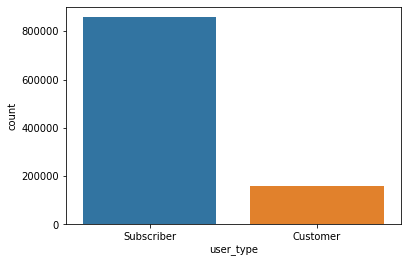

In [150]:
sb.countplot(data=df,x='user_type')

#### Finding an trend based on the ride in month

In [151]:
df['month']=pd.DatetimeIndex(df['start_time']).month
df['day']=pd.DatetimeIndex(df['start_time']).day

Text(0.5, 1.0, 'Avg ride per month')

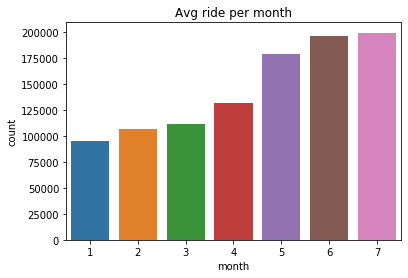

In [152]:
sb.countplot(data=df,x='month')
plt.title('Avg ride per month')

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I didn't see any unusal points. I didn't perform any transformation. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Just to make sure that data type are correct I changed someof the datatype. Also, I have extracted and transformed data into month, day, sec, minutes and hour. 

## Bivariate Exploration

> Now, we will explore relationhip between various relationship of variable. 

#### Understanding the relationship 

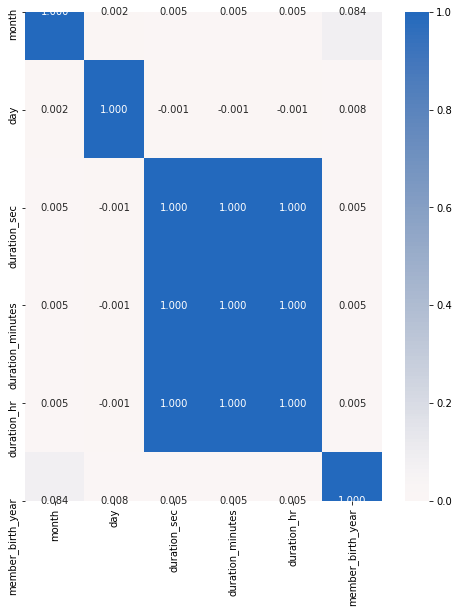

In [153]:
var=['month','day','duration_sec','duration_minutes','duration_hr','member_birth_year']
plt.figure(figsize=[8,9])
sb.heatmap(df[var].corr(),annot=True,fmt='.3f',cmap = 'vlag_r',center=0)
plt.show()

>Looking at the figure we can see how each variable are corelated to each other. Also, 1.00 is strongly corelated

### User type and time they spend on ride

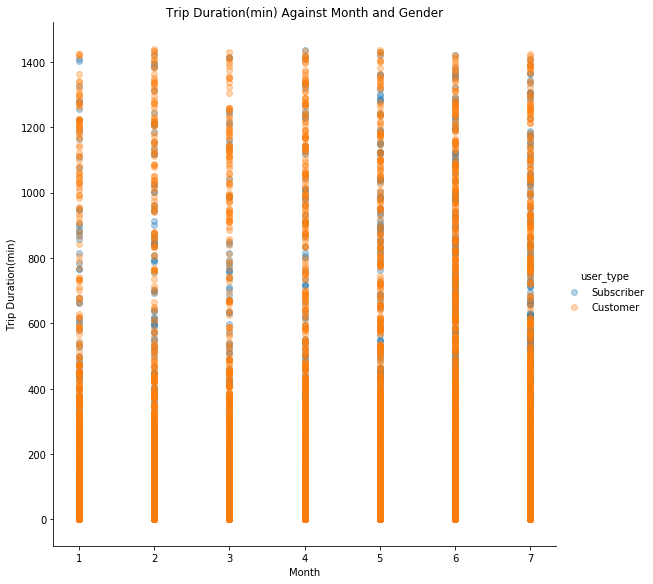

In [154]:
g = sb.FacetGrid(data =  df, hue = 'user_type', height = 8)
g.map(plt.scatter, 'month','duration_minutes', alpha = 1/3)
g.add_legend()
plt.title('Trip Duration(min) Against Month and Gender')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)');

## Counting ride based on gender 


Text(0.5, 1.0, 'Count based on gender')

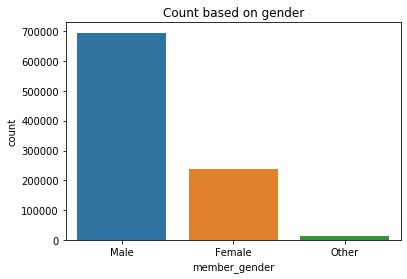

In [155]:
sb.countplot(data=df,x='member_gender')
plt.title('Count based on gender')

Looking at this plot we can clearly see that male number are the highest that are riding the bike 

### Age And ride relationship 

Text(0.5, 1, 'Relationship Between age and duration in minutes')

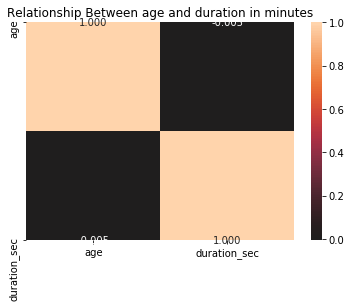

In [156]:
var=['age','duration_sec']
sb.heatmap(df[var].corr(),annot=True,fmt='.3f',center=0)
plt.title('Relationship Between age and duration in minutes')

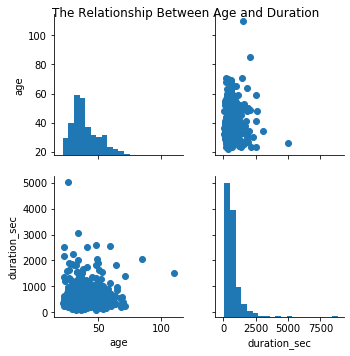

In [157]:
samples = np.random.choice(df.shape[0], 500, replace = False)
df_samp = df.loc[samples,:]

g = sb.PairGrid(data = df_samp, vars = var)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter)
g.fig.suptitle('The Relationship Between Age and Duration');


Looking at the correlation between age and duration_sec is negative. Looking at the relationship between age and duration we can see that age is distributed between 20 and 40. 

### Top 5 places for starting a trip 

Text(0, 0.5, 'Station Name')

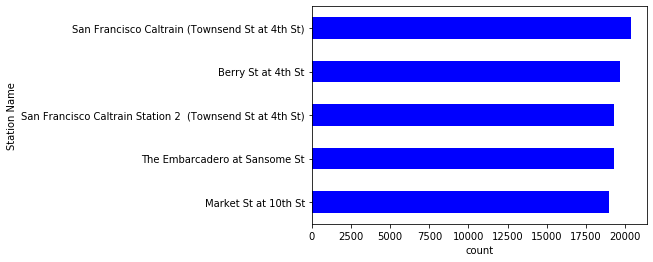

In [158]:
top=df.start_station_name.value_counts()[1:6].sort_values()
top.plot(kind='barh',color='blue')
plt.xlabel('count')
plt.ylabel('Station Name')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
<ul>
    <li>Trips made by male is much more higher than the female. </li>
    <li> Number of trips made by suscriber is higher than the  customer due to pricing issues. </li>
    <li>Looking at the  most 5 big trips that had happended is from Sa Fransico caltrain station. We can assume that it is used by people who work in the Bay Area. </li>
</ul>

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> During my observation I came to find out that the age and duration in second is neagtively correlated. Also, the population of age locates between 20 and 40. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Now, we will be looking at the relationship between month, trip length and gender. Basically, we will be looking at how these three variables are related. 

Text(28.98096679687501, 0.5, 'Duration')

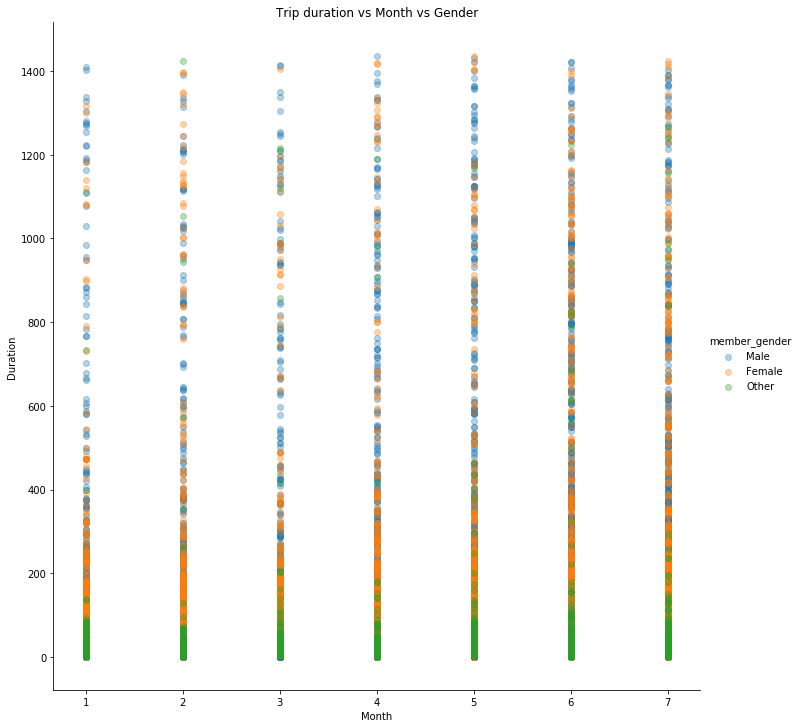

In [159]:
dfvar=sb.FacetGrid(data=df,hue='member_gender',height=10)
dfvar.map(plt.scatter,'month','duration_minutes',alpha=1/3)
dfvar.add_legend()
plt.title('Trip duration vs Month vs Gender')
plt.xlabel('Month')
plt.ylabel('Duration')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> Looking at this we can clearly see that male user has longer duration of ride that has been made and alsofemale has done more trips than other. 
### Were there any interesting or surprising interactions between features?
> Intresting fact about the relationship that i found out that in summer i.e. June and july female also has longer duration time in trips. Male users are consistent throughout the year. 

In [160]:

df.to_csv('df_clean.csv', 
                 index=False, encoding = 'utf-8')